# 1 关联图correlation

## 1.6 边缘直方图

横坐标：发动机排量(L)<br>
纵坐标：公路里程/加仑<br>
散点颜色：制造商

### 1.6.1 导入需要的绘图库

In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1.6.2 准备画布与子图

#### plt.figure：构建画布

figsize：画布大小<br>
dpi：图像分辨率

#### plt.GridSpec：在画布上进行分割

nrows：画布上存在多少行<br>
ncols：画布上存在多少列<br>
hspace：格子之间上下的间隔<br>
wspace：格子之间左右的间隔

In [3]:
#创建画布与格子
fig = plt.figure(figsize = (16,10), dpi = 80)
grid = plt.GridSpec(4, 4, hspace = 0.5, wspace = 0.2)

<Figure size 1280x800 with 0 Axes>

#### fig.add_subplot：在画布上建立子图

\*args：一个3位整数或3个独立的整数，用于描述子图的位置。如果三个整数按顺序为行、列和索引，则子图将采用行*列网格上的索引所对应的位置。索引从左上角的0开始，向右增加，最右及最下用-1表示。与Python中所有的索引一样，取前不取后。

In [4]:
#添加子图
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels = [], yticklabels = [])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels = [], yticklabels = [])

### 1.6.3 认识绘制直方图的函数

#### plt.hist()

* x：需要分析的变量<br>
* bins：把变量分成多少段<br>
* orientation：直方图的方向，可分为横向(horizontal)和纵向(vertical默认)<br>
* histtype：生成的直方图的类型，可输入{'bar', 'baarstacked', 'step', 'stepfilled'}四种类型，分别代表：<br>
'bar'是传统的条形直方图。如果给出多个数据，则条并排排列；<br>
'barstacked'是条形直方图，其中多个数据堆叠在一起；<br>
'step'生成一个默认未填充的线条轮廓；<br>
'stepfilled'生成一个默认填充的线条轮廓

In [7]:
#构建数据
X = np.random.randn(10000) #标准正态分布

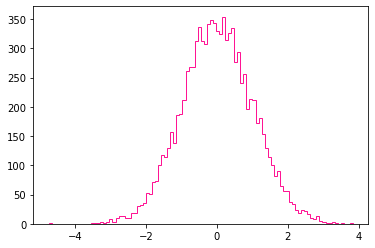

In [16]:
n, bins, patches = plt.hist(x = X #需要分析的变量
                           ,bins = 100 #需要把变量分成多少段，即形成多少个柱子的分布
                           #,orientation = 'horizontal'
                           ,histtype = 'step'
                           ,color = 'deeppink'
                           )
#自动返回三项内容：每个箱子中含有多少个样本，在变量中划分出的箱子的宽度，用于创建直方图的补丁列表

In [17]:
n

array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   1.,   1.,   1.,   3.,   1.,   3.,   8.,   3.,
        10.,  14.,  14.,  10.,  10.,  18.,  19.,  30.,  32.,  35.,  53.,
        51.,  72.,  73., 101., 117., 114., 130., 157., 138., 186., 188.,
       211., 261., 268., 268., 313., 336., 313., 308., 341., 349., 344.,
       329., 324., 354., 314., 327., 335., 276., 293., 241., 256., 196.,
       214., 212., 172., 181., 154., 129., 115., 101.,  82.,  91.,  64.,
        56.,  56.,  37.,  33.,  23.,  19.,  24.,  22.,  16.,  10.,   8.,
        14.,   4.,   3.,   2.,   1.,   3.,   1.,   0.,   1.,   0.,   0.,
         1.])

In [18]:
n.shape

(100,)

In [19]:
bins #横坐标的值，101个点

array([-4.75643909, -4.67048171, -4.58452433, -4.49856695, -4.41260958,
       -4.3266522 , -4.24069482, -4.15473744, -4.06878006, -3.98282268,
       -3.8968653 , -3.81090792, -3.72495055, -3.63899317, -3.55303579,
       -3.46707841, -3.38112103, -3.29516365, -3.20920627, -3.1232489 ,
       -3.03729152, -2.95133414, -2.86537676, -2.77941938, -2.693462  ,
       -2.60750462, -2.52154725, -2.43558987, -2.34963249, -2.26367511,
       -2.17771773, -2.09176035, -2.00580297, -1.9198456 , -1.83388822,
       -1.74793084, -1.66197346, -1.57601608, -1.4900587 , -1.40410132,
       -1.31814395, -1.23218657, -1.14622919, -1.06027181, -0.97431443,
       -0.88835705, -0.80239967, -0.71644229, -0.63048492, -0.54452754,
       -0.45857016, -0.37261278, -0.2866554 , -0.20069802, -0.11474064,
       -0.02878327,  0.05717411,  0.14313149,  0.22908887,  0.31504625,
        0.40100363,  0.48696101,  0.57291838,  0.65887576,  0.74483314,
        0.83079052,  0.9167479 ,  1.00270528,  1.08866266,  1.17

In [20]:
bins.shape

(101,)

In [21]:
patches

<a list of 1 Patch objects>

In [22]:
[*patches]

### 1.6.4 认识数据

In [24]:
df = pd.read_csv('http://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv')

In [25]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [26]:
df.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

In [27]:
name = ['汽车制造商','型号名称','发动机排量(L)','制造年份','气缸数量','手动/自动','驱动类型','城市里程/加仑','公路里程/加仑','汽油种类','车辆种类']
#驱动类型：四轮，前轮，后轮
#能源种类：汽油，柴油，用电等等
#车辆种类：皮卡，SUV，小型，中型等等
#城市里程/加仑，公路里程/加仑：表示使用每加仑汽油能够跑的英里数，数值越大代表汽车越节能

In [28]:
[*zip(df.columns.values, np.array(name))]

[('manufacturer', '汽车制造商'),
 ('model', '型号名称'),
 ('displ', '发动机排量(L)'),
 ('year', '制造年份'),
 ('cyl', '气缸数量'),
 ('trans', '手动/自动'),
 ('drv', '驱动类型'),
 ('cty', '城市里程/加仑'),
 ('hwy', '公路里程/加仑'),
 ('fl', '汽油种类'),
 ('class', '车辆种类')]

### 1.6.5 绘制图像，代码详解

In [30]:
df.manufacturer #提取manufacturer这一列

0            audi
1            audi
2            audi
3            audi
4            audi
          ...    
229    volkswagen
230    volkswagen
231    volkswagen
232    volkswagen
233    volkswagen
Name: manufacturer, Length: 234, dtype: object

In [31]:
df.manufacturer.astype('category') #变成分类型变量，dtype变成category

0            audi
1            audi
2            audi
3            audi
4            audi
          ...    
229    volkswagen
230    volkswagen
231    volkswagen
232    volkswagen
233    volkswagen
Name: manufacturer, Length: 234, dtype: category
Categories (15, object): [audi, chevrolet, dodge, ford, ..., pontiac, subaru, toyota, volkswagen]

In [32]:
df.manufacturer.astype('category').cat #取出分类型变量的类别

In [33]:
df.manufacturer.astype('category').cat.codes #按照类别进行编码，常用的编码方式

0       0
1       0
2       0
3       0
4       0
       ..
229    14
230    14
231    14
232    14
233    14
Length: 234, dtype: int8

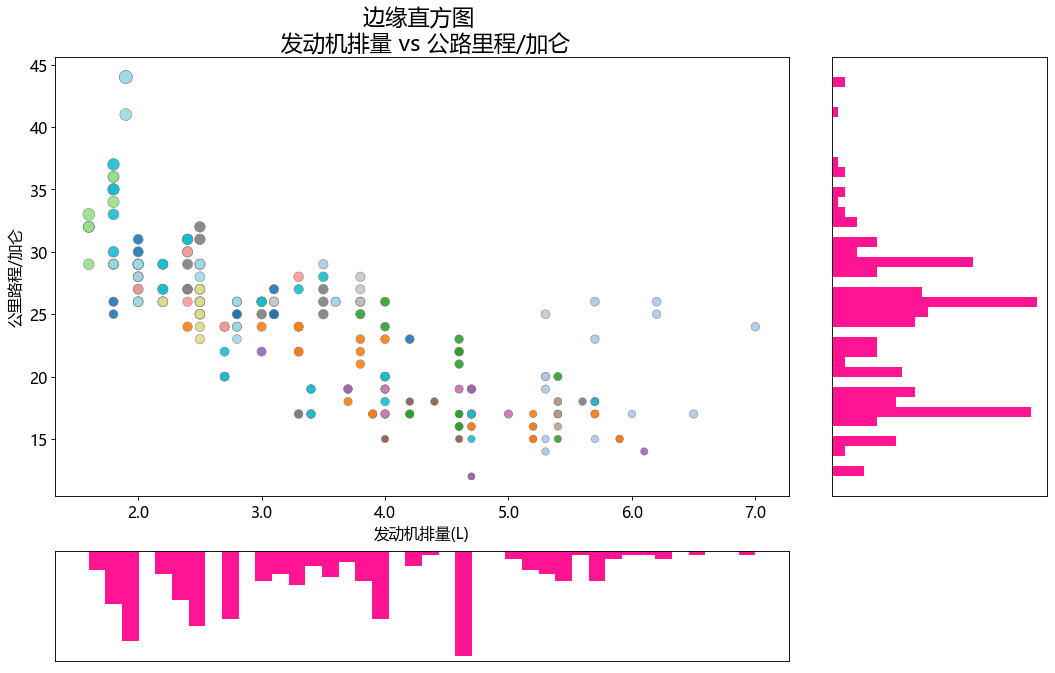

In [51]:
#分割画布
fig = plt.figure(figsize = (16,10), dpi = 80, facecolor = 'white')
grid = plt.GridSpec(4, 4, hspace = 0.5, wspace = 0.2)

#在分割完毕的画布上确认子图的位置
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels = [], yticklabels = [])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels = [], yticklabels = [])

#在中心绘制气泡图
ax_main.scatter('displ', 'hwy' #横纵坐标
               ,data = df
               ,s = df.cty*4 #气泡图
               ,c = df.manufacturer.astype('category').cat.codes #制造商的类别
               ,cmap = 'tab20' #可以根据自己喜欢的颜色随意修改
               ,edgecolors = 'gray'
               ,linewidths = 0.5
               ,alpha = 0.9)

#绘制底部的直方图
ax_bottom.hist(df.displ
              ,40 #40段
              ,histtype = 'stepfilled'
              ,orientation = 'vertical'
              ,color = 'deeppink')
ax_bottom.invert_yaxis() #让y轴反向，为了美观所以让分布形成朝下的分布

#绘制右侧的直方图
ax_right.hist(df.hwy
             ,40
             ,histtype = 'stepfilled'
             ,orientation = 'horizontal'
             ,color = 'deeppink'
             )

#装饰图像
plt.rcParams['font.sans-serif'] = ['Microsoft Yahei'] #显示中文微软雅黑
##主图
ax_main.set(title = '边缘直方图 \n 发动机排量 vs 公路里程/加仑' #主图标题
           ,xlabel = '发动机排量(L)' #主图横坐标轴名称
           ,ylabel = '公里路程/加仑' #主图纵坐标轴名称
           )
ax_main.title.set_fontsize(20) #标题字体大小

for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14) #对所有横坐标纵坐标上的标题和刻度都设置字体大小为14

for item in [ax_bottom, ax_right]:
    item.set_xticks([])
    item.set_yticks([]) #去掉两个直方图上的标尺，设为空

xlabels = ax_main.get_xticks().tolist() #将现有的标尺取出来，tolist转化为带一位小数的浮点数
ax_main.set_xticklabels(xlabels) #再将带一位小数的浮点数变成标尺
plt.show()

In [36]:
ax_main.title #标题的位置和内容，0.5表示x轴正中间

Text(0.5, 1.0, '边缘直方图 \n 发动机排量 vs 公路里程/加仑')

In [37]:
ax_main.xaxis.label #x轴标签的位置和名字

Text(0.5, 152.39393939393932, '发动机排量(L)')

In [39]:
ax_main.yaxis.label

Text(20.000000000000007, 0.5, '公里路程/加仑')

In [38]:
[ax_main.xaxis.label, ax_main.yaxis.label]

[Text(0.5, 152.39393939393932, '发动机排量(L)'),
 Text(20.000000000000007, 0.5, '公里路程/加仑')]

In [41]:
ax_main.get_xticklabels()

<a list of 8 Text major ticklabel objects>

In [45]:
ax_main.get_xticks().tolist()

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]

In [42]:
ax_main.get_yticklabels()

<a list of 9 Text major ticklabel objects>

In [46]:
ax_main.get_xticklabels() + ax_main.get_yticklabels() #前两个数字表示刻度的位置，第三个数字（字符串）表示刻度内容

[Text(1.0, 0, '1'),
 Text(2.0, 0, '2'),
 Text(3.0, 0, '3'),
 Text(4.0, 0, '4'),
 Text(5.0, 0, '5'),
 Text(6.0, 0, '6'),
 Text(7.0, 0, '7'),
 Text(8.0, 0, '8'),
 Text(0, 10.0, '10'),
 Text(0, 15.0, '15'),
 Text(0, 20.0, '20'),
 Text(0, 25.0, '25'),
 Text(0, 30.0, '30'),
 Text(0, 35.0, '35'),
 Text(0, 40.0, '40'),
 Text(0, 45.0, '45'),
 Text(0, 50.0, '50')]

In [47]:
[ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()

[Text(0.5, 152.39393939393932, '发动机排量(L)'),
 Text(20.000000000000007, 0.5, '公里路程/加仑'),
 Text(1.0, 0, '1'),
 Text(2.0, 0, '2'),
 Text(3.0, 0, '3'),
 Text(4.0, 0, '4'),
 Text(5.0, 0, '5'),
 Text(6.0, 0, '6'),
 Text(7.0, 0, '7'),
 Text(8.0, 0, '8'),
 Text(0, 10.0, '10'),
 Text(0, 15.0, '15'),
 Text(0, 20.0, '20'),
 Text(0, 25.0, '25'),
 Text(0, 30.0, '30'),
 Text(0, 35.0, '35'),
 Text(0, 40.0, '40'),
 Text(0, 45.0, '45'),
 Text(0, 50.0, '50')]

In [49]:
ax_main.get_xticks()

array([1., 2., 3., 4., 5., 6., 7., 8.])